In [1]:
from keras.datasets import reuters
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
#top 10000 most frequently used words for each data
# so the column number is maximum 10000
# restore np.load for future normal usage
np.load = np_load_old

Using TensorFlow backend.
/home/shahir/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/shahir/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
#data decoding 
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [3]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [4]:
train_labels[10]

3

In [7]:
#data preparation 

#vectorizing the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#vectorizing the labels with one-hot encoding 
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
#model creation 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 3.1411 - accuracy: 0.4120 - val_loss: 1.7617 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.5315 - accuracy: 0.6981 - val_loss: 1.3112 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0903 - accuracy: 0.7709 - val_loss: 1.1555 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8473 - accuracy: 0.8245 - val_loss: 1.0339 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6739 - accuracy: 0.8605 - val_loss: 0.9890 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5182 - accuracy: 0.8920 - val_loss: 0.9315 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4223 - accuracy: 0.9118 - val_loss: 0.8992 - val_accuracy: 0.8110
Epoch 8/20
16

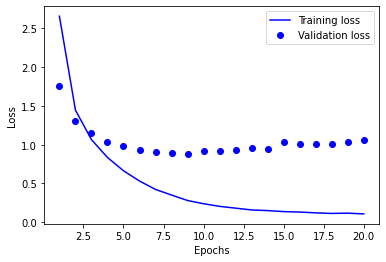

In [23]:
#plotting the values 
import matplotlib.pyplot as plt

history_dict = history.history
val_loss = history_dict['val_loss']
loss = history_dict['loss']
ephocs = range(1, 21)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
#model creation 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/9
16/16 [==============================] - 1s 22ms/step - loss: 3.0910 - accuracy: 0.4155 - val_loss: 1.6466 - val_accuracy: 0.6610
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.4400 - accuracy: 0.7021 - val_loss: 1.2741 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0572 - accuracy: 0.7688 - val_loss: 1.1078 - val_accuracy: 0.7580
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8395 - accuracy: 0.8181 - val_loss: 1.0343 - val_accuracy: 0.7710
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6660 - accuracy: 0.8546 - val_loss: 0.9596 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5232 - accuracy: 0.8949 - val_loss: 0.9132 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4055 - accuracy: 0.9182 - val_loss: 0.8989 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

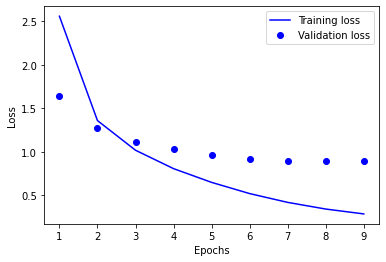

In [28]:
#plotting the values 
import matplotlib.pyplot as plt

history_dict = history.history
val_loss = history_dict['val_loss']
loss = history_dict['loss']
epochs = range(1, 10)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, one_hot_test_la)